In [313]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
train = pd.read_csv('train.csv');

In [315]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [316]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


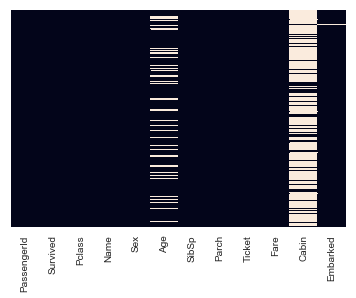

In [317]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

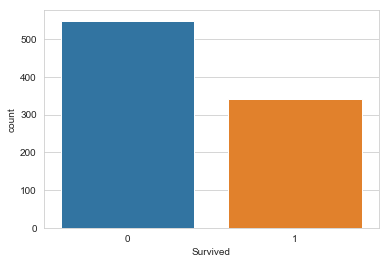

In [318]:
sns.set_style()
sns.countplot(x='Survived',data=train)

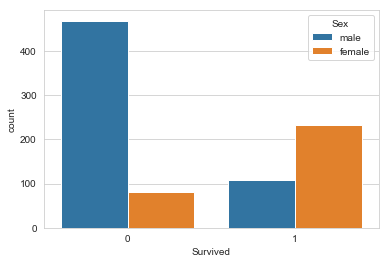

In [319]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

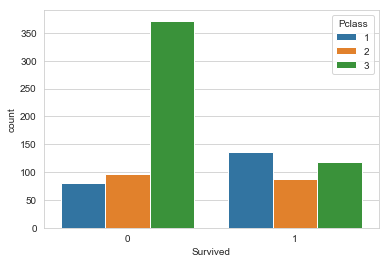

In [320]:
sns.set_style(None)
sns.countplot(x='Survived',hue='Pclass',data=train)

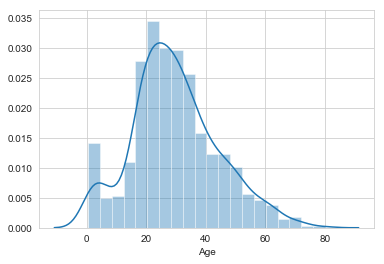

In [321]:
sns.distplot(train['Age'].dropna())

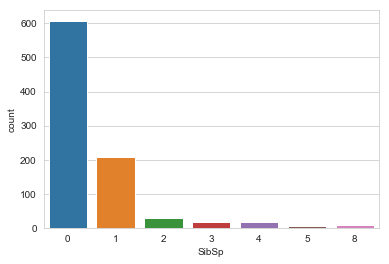

In [322]:
sns.countplot(x='SibSp',data=train)

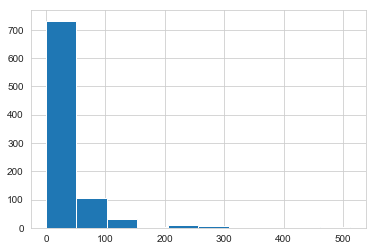

In [323]:
train['Fare'].dropna().hist()

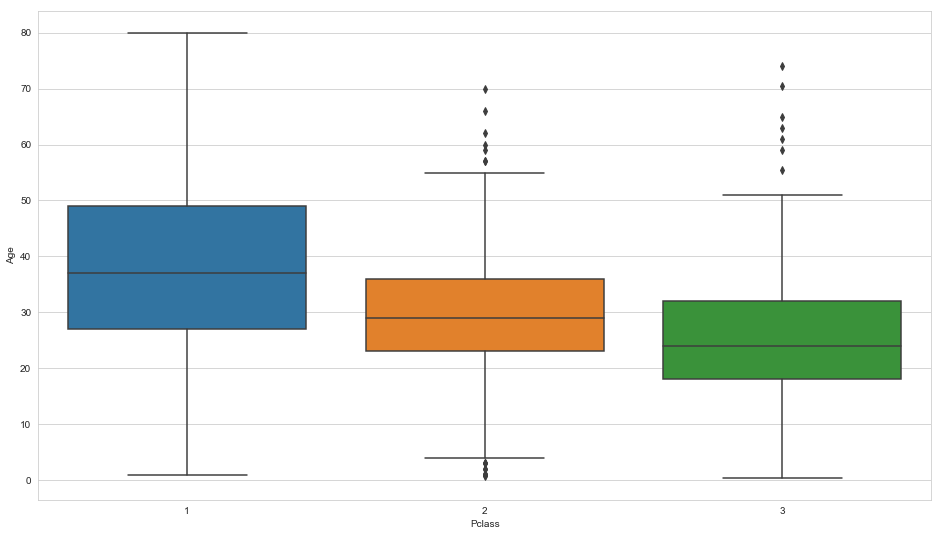

In [324]:
plt.figure(figsize=(16,9))
sns.boxplot(y='Age',x='Pclass',data=train)

In [325]:
train['Age_median'] = train['Age'].fillna(train['Age'].median())

In [326]:
train['cabin_null'] = np.where(train['Cabin'].isnull(),1,0)

In [327]:
train.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [328]:
#Function to remove null values from age
def inpute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [329]:
train['Age'] = train[['Age','Pclass']].apply(inpute_age,axis=1)

In [330]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,1


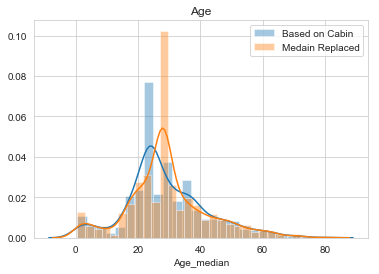

In [331]:
%matplotlib inline
fig,ax = plt.subplots()
sns.distplot(train['Age'],label='Based on Cabin')
sns.distplot(train['Age_median'],label='Medain Replaced')
plt.title('Age')
ax.legend()

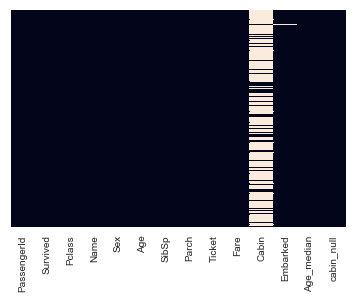

In [332]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [333]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,1
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q,28.0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.0,1


In [334]:
#For cabin, we have a lot of NaN value. So in order to replace with some 
#value, we have to apply feature Engineering

In [335]:
train.drop(['Cabin'],inplace=True,axis=1)

In [336]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_median,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0,1


In [337]:
test = pd.read_csv('test.csv')

In [338]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [339]:
cabin_null = np.where(test.Cabin.isnull(),1,0)

In [340]:
test.drop('Cabin',axis=1,inplace=True)

In [341]:
test['cabin_null'] = cabin_null
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_null
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


In [342]:
Embarked = pd.get_dummies(test['Embarked'],drop_first=True)
Sex = pd.get_dummies(test['Sex'],drop_first=True)

In [343]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [344]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,cabin_null
0,892,3,34.5,0,0,7.8292,1
1,893,3,47.0,1,0,7.0000,1
2,894,2,62.0,0,0,9.6875,1
3,895,3,27.0,0,0,8.6625,1
4,896,3,22.0,1,1,12.2875,1


In [345]:
test = pd.concat([test,Sex,Embarked],axis=1)

In [346]:
Embarked = pd.get_dummies(train['Embarked'],drop_first=True)
Sex = pd.get_dummies(train['Sex'],drop_first=True)

In [347]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [348]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_median,cabin_null
0,1,0,3,22.0,1,0,7.2500,22.0,1
1,2,1,1,38.0,1,0,71.2833,38.0,0
2,3,1,3,26.0,0,0,7.9250,26.0,1
3,4,1,1,35.0,1,0,53.1000,35.0,0
4,5,0,3,35.0,0,0,8.0500,35.0,1


In [349]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,cabin_null,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,1,0
3,895,3,27.0,0,0,8.6625,1,1,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,1


In [350]:
train = pd.concat([train,Sex,Embarked],axis=1)

In [351]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_median,cabin_null,male,Q,S
0,1,0,3,22.0,1,0,7.2500,22.0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,38.0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,26.0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,35.0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,35.0,1,1,0,1


In [352]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,cabin_null,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,1,0
3,895,3,27.0,0,0,8.6625,1,1,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,1


In [353]:
train.drop(['Survived','Age_median'],axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,cabin_null,male,Q,S
0,1,3,22.0,1,0,7.2500,1,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,1
4,5,3,35.0,0,0,8.0500,1,1,0,1


In [354]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [355]:
def params(X_train,y_train):
    from sklearn.metrics import accuracy_score as acc
    from sklearn.metrics import confusion_matrix as cm
    from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
    from sklearn.metrics import roc_auc_score, roc_curve,scorer, f1_score, precision_score, recall_score
    from sklearn.metrics import precision_recall_curve, average_precision_score
    
    pred = model.predict(X_train)
    %matplotlib inline
    prob = model.predict_proba(X_train)
    fpr,tpr,thresh = roc_curve(y_train,prob[:,1])
    pre,rec,th = precision_recall_curve(y_train,prob[:,1])
    plt.plot(fpr, tpr, linestyle='--', label='Model')
    plt.plot([0, 1], [0, 1], color='navy',label='No Skill', linestyle='-.')
    plt.legend(loc="lower right")
    plt.show()
    plt.plot(pre, rec, linestyle='--', label='Model')
    plt.legend(loc="lower right")
    print('auc socre',roc_auc_score(pred,y_train))
    print(cm(pred,y_train))
    print('accuracy',acc(pred,y_train))
    print('precision',precision_score(pred,y_train))
    print('recall',recall_score(pred,y_train))
    print('F1',f1_score(pred,y_train))
    print('Kappa',cohen_kappa_score(pred,y_train))
    print('Classification report \n',classification_report(pred,y_train))

In [356]:
# sns.heatmap(X_train.isnull())

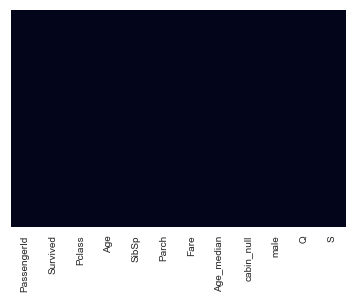

In [357]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False)

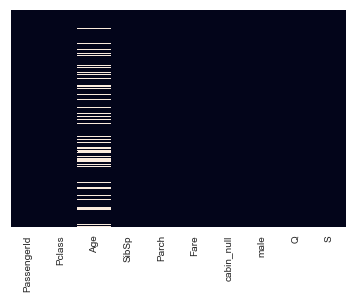

In [358]:
sns.heatmap(test.isnull(),cbar=False,yticklabels=False)

In [359]:
test['Age'] = test[['Age','Pclass']].apply(inpute_age,axis=1)

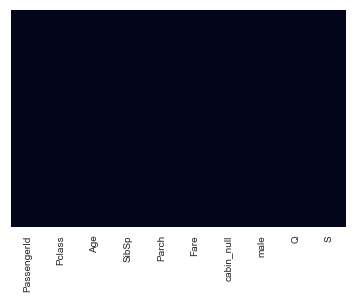

In [360]:
sns.heatmap(test.isnull(),cbar=False,yticklabels=False)

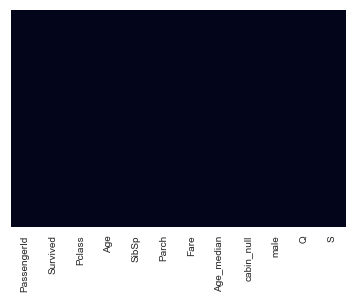

In [362]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False)

In [364]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,cabin_null,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,1,0
3,895,3,27.0,0,0,8.6625,1,1,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,1


In [365]:
X = train.drop(['PassengerId','Survived','Age_median'],axis=1)
y = train.Survived

In [366]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,cabin_null,male,Q,S
0,3,22.0,1,0,7.2500,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,1,0,1


In [367]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,cabin_null,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,1,0
3,895,3,27.0,0,0,8.6625,1,1,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,1


In [370]:
test.drop('PassengerId',axis=1,inplace=True)

In [371]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,cabin_null,male,Q,S
0,3,34.5,0,0,7.8292,1,1,1,0
1,3,47.0,1,0,7.0000,1,0,0,1
2,2,62.0,0,0,9.6875,1,1,1,0
3,3,27.0,0,0,8.6625,1,1,0,1
4,3,22.0,1,1,12.2875,1,0,0,1


In [372]:
X

,Pclass,Age,SibSp,Parch,Fare,cabin_null,male,Q,S
0,3,22.0,1,0,7.2500,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,1,0,1
5,3,24.0,0,0,8.4583,1,1,1,0
6,1,54.0,0,0,51.8625,0,1,0,1
7,3,2.0,3,1,21.0750,1,1,0,1
8,3,27.0,0,2,11.1333,1,0,0,1
9,2,14.0,1,0,30.0708,1,0,0,0


In [373]:
# test = test.iloc[:,1:]
test.Fare.fillna(test.Fare.dropna().median(),inplace=True)
test.head()

,Pclass,Age,SibSp,Parch,Fare,cabin_null,male,Q,S
0,3,34.5,0,0,7.8292,1,1,1,0
1,3,47.0,1,0,7.0000,1,0,0,1
2,2,62.0,0,0,9.6875,1,1,1,0
3,3,27.0,0,0,8.6625,1,1,0,1
4,3,22.0,1,1,12.2875,1,0,0,1


In [374]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,cabin_null,male,Q,S
0,3,22.0,1,0,7.2500,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,1,0,1


In [378]:
y_test = pd.read_csv('gender_submission.csv')
y_test = y_test.iloc[:,1:]

In [379]:
y_test.head()

,Survived
0,0
1,1
2,0
3,0
4,1


C:\Users\shash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


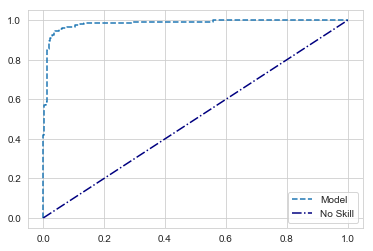

auc socre 0.9523809523809523
[[256   8]
 [ 10 144]]
accuracy 0.9569377990430622
precision 0.9473684210526315
recall 0.935064935064935
F1 0.9411764705882352
Kappa 0.9072164948453608
Classification report 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       264
           1       0.95      0.94      0.94       154

   micro avg       0.96      0.96      0.96       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.96      0.96      0.96       418



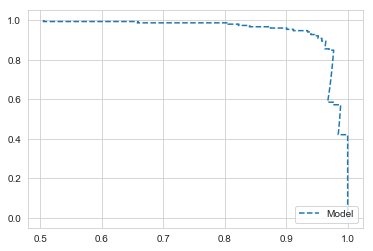

In [380]:
from sklearn.linear_model import LogisticRegression as LR
model = LR()
model.fit(X,y)
params(test,X_test)

C:\Users\shash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


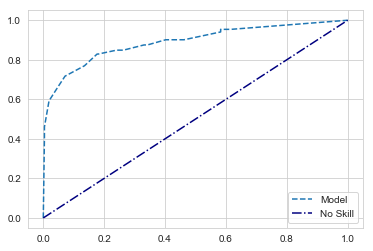

auc socre 0.816315205327414
[[230  35]
 [ 36 117]]
accuracy 0.8301435406698564
precision 0.7697368421052632
recall 0.7647058823529411
F1 0.7672131147540983
Kappa 0.6335053965274519
Classification report 
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       265
           1       0.77      0.76      0.77       153

   micro avg       0.83      0.83      0.83       418
   macro avg       0.82      0.82      0.82       418
weighted avg       0.83      0.83      0.83       418



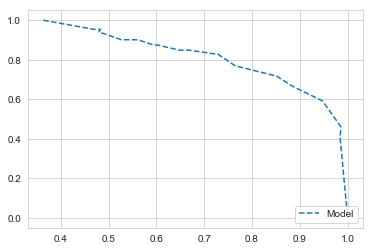

In [383]:
from sklearn.ensemble import RandomForestClassifier as RFC
model = RFC(random_state=0)
model.fit(X,y)
params(test,y_test)

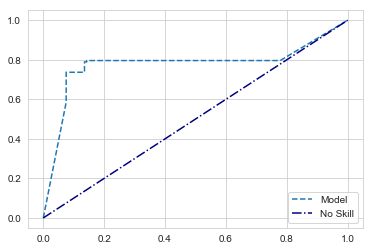

auc socre 0.8187229437229437
[[230  34]
 [ 36 118]]
accuracy 0.8325358851674641
precision 0.7763157894736842
recall 0.7662337662337663
F1 0.7712418300653594
Kappa 0.6391752577319587
Classification report 
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       264
           1       0.78      0.77      0.77       154

   micro avg       0.83      0.83      0.83       418
   macro avg       0.82      0.82      0.82       418
weighted avg       0.83      0.83      0.83       418



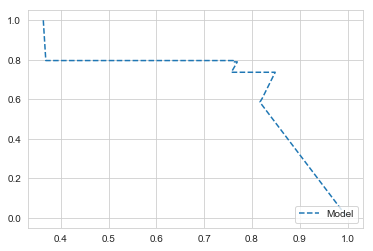

In [392]:
from sklearn.tree import DecisionTreeClassifier
model = tree.DecisionTreeClassifier()
model = DecisionTreeClassifier(max_depth=9,criterion='gini')
# model = DecisionTreeClassifier(max_depth=9,criterion='entropy')
model.fit(X,y)
params(test,y_test)
import graphviz
# DOT data
dot_data = tree.export_graphviz(model)

# Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph

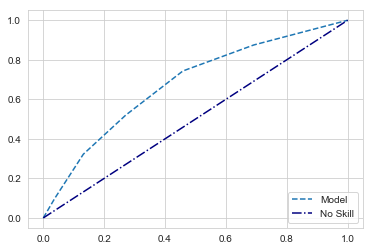

auc socre 0.6248852841233227
[[194  73]
 [ 72  79]]
accuracy 0.65311004784689
precision 0.5197368421052632
recall 0.5231788079470199
F1 0.5214521452145215
Kappa 0.24941176470588233
Classification report 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       267
           1       0.52      0.52      0.52       151

   micro avg       0.65      0.65      0.65       418
   macro avg       0.62      0.62      0.62       418
weighted avg       0.65      0.65      0.65       418



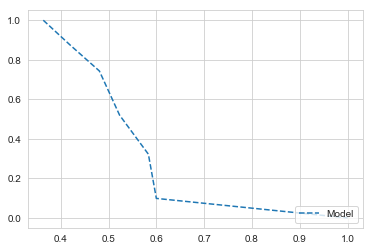

In [393]:
from sklearn.neighbors import KNeighborsClassifier as knn
model = knn()
model.fit(X,y)
params(test,y_test)

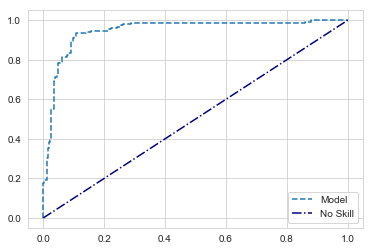

auc socre 0.8904747170005931
[[250  29]
 [ 16 123]]
accuracy 0.8923444976076556
precision 0.8092105263157895
recall 0.8848920863309353
F1 0.8453608247422679
Kappa 0.7630445189085687
Classification report 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       279
           1       0.81      0.88      0.85       139

   micro avg       0.89      0.89      0.89       418
   macro avg       0.87      0.89      0.88       418
weighted avg       0.90      0.89      0.89       418



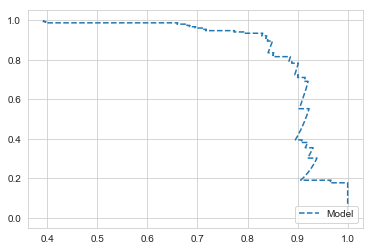

In [394]:
from xgboost import XGBClassifier as xgb
model = xgb()
model.fit(X,y)
params(test,y_test)

-----------------------------------------------------------------------------------------------------------